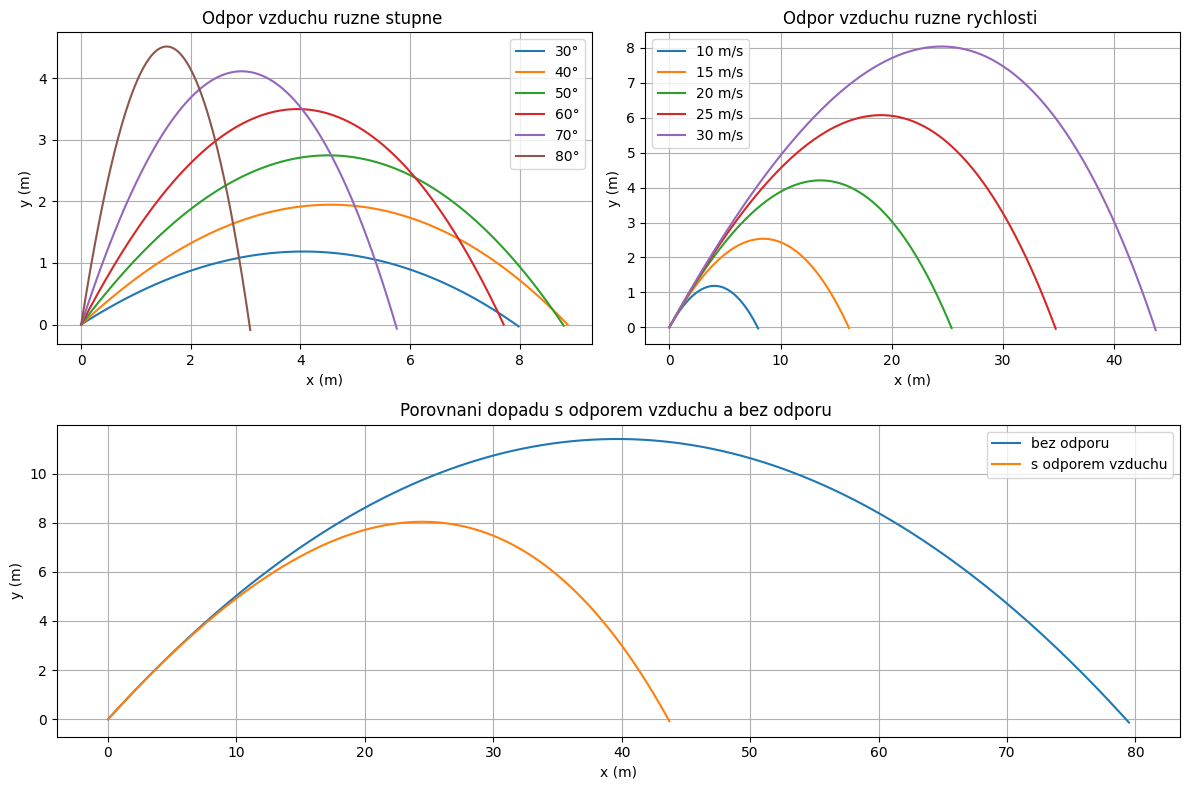

In [2]:
import matplotlib.pyplot as plt
from typing import Tuple, List
import math


TIHOVE_ZRYCHLENI: float = 9.8       #m/s2
CINITEL_ODPORU: float = 0.5         #kg/m3
HUSTOTA_VZDUCHU: float = 1.2225
PRUMER_KOULE: float = 0.1
CASOVY_KROK: float = 0.01    #1E-5
HMOTNOST_KOULE: float = 0.145
PLOCHA_PRUMETU = math.pi*PRUMER_KOULE**2/4


def spocitej_sikmy_vrh(uhel_stup: int, pocatecni_rychlost: float, odpor_prostredi: bool=True) -> Tuple[List[float], List[float]]:
    """ Funkce pocita souradnice pohybu telesa sikmeho vrhu. 

    Args:
        uhel_stup (int): Stupen vystrel objektu z dela ve stupnich.
        pocatecni(float): Pocatecni rychlost objektu se kterou byl vystrelen z dela.
        odpor_prostredi(bool): Pritomnost odpotu vzduchu. Imolicintne nasteveno na False.

    Returns:
        Tuple(List[float], List[float]): Seznam poloh na ose x a y
    """
    uhel= math.radians(uhel_stup)      # v rad   
    poloha_x= [0.0]
    poloha_y= [0.0]
    rychlost_x= pocatecni_rychlost * math.cos(uhel)
    rychlost_y= pocatecni_rychlost * math.sin(uhel) 
    cas=0.0
    
    while poloha_y[-1] >= 0:
        
        if odpor_prostredi:

            rychost=math.sqrt(rychlost_x**2 + rychlost_y**2)
            
            odpor_vzduchu_x= -1/2 * CINITEL_ODPORU * PLOCHA_PRUMETU * HUSTOTA_VZDUCHU * rychost * rychlost_x
            odpor_vzduchu_y= -1/2 * CINITEL_ODPORU * PLOCHA_PRUMETU * HUSTOTA_VZDUCHU * rychost * rychlost_y

            zrychleni_x= odpor_vzduchu_x / HMOTNOST_KOULE
            zrychleni_y= odpor_vzduchu_y /HMOTNOST_KOULE - TIHOVE_ZRYCHLENI
                
        else:
            zrychleni_x= 0.0
            zrychleni_y= -TIHOVE_ZRYCHLENI
        
        rychlost_x += zrychleni_x * CASOVY_KROK
        rychlost_y += zrychleni_y * CASOVY_KROK
                
        poloha_x.append(poloha_x[-1] + rychlost_x * CASOVY_KROK)
        poloha_y.append(poloha_y[-1] + rychlost_y * CASOVY_KROK)
        
        cas += CASOVY_KROK                

    return poloha_x, poloha_y     


uhly = [30, 40, 50, 60, 70, 80]
rychlosti = [10, 15, 20, 25, 30]

plt.figure(figsize=(12, 8))
# 1
plt.subplot(2, 2, 1)
for uhel in uhly:
    poloha_x, poloha_y = spocitej_sikmy_vrh(uhel, 10, True)
    plt.plot(poloha_x, poloha_y, label=f'{uhel}°')
plt.title('Odpor vzduchu ruzne stupne ')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)

#2
plt.subplot(2, 2, 2)
for rychlost in rychlosti:
    poloha_x, poloha_y = spocitej_sikmy_vrh(30, rychlost, True)
    plt.plot(poloha_x, poloha_y, label=f'{rychlost} m/s')
plt.title('Odpor vzduchu ruzne rychlosti ')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)

#3
plt.subplot(2, 2, (3,4))
poloha_x4,poloha_y4 = spocitej_sikmy_vrh(30,30, False)
poloha_x5,poloha_y5 = spocitej_sikmy_vrh(30,30, True)
plt.plot(poloha_x4,poloha_y4, label='bez odporu')
plt.plot(poloha_x5,poloha_y5, label='s odporem vzduchu')
plt.title('Porovnani dopadu s odporem vzduchu a bez odporu ')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig('jedna.png')
plt.show()

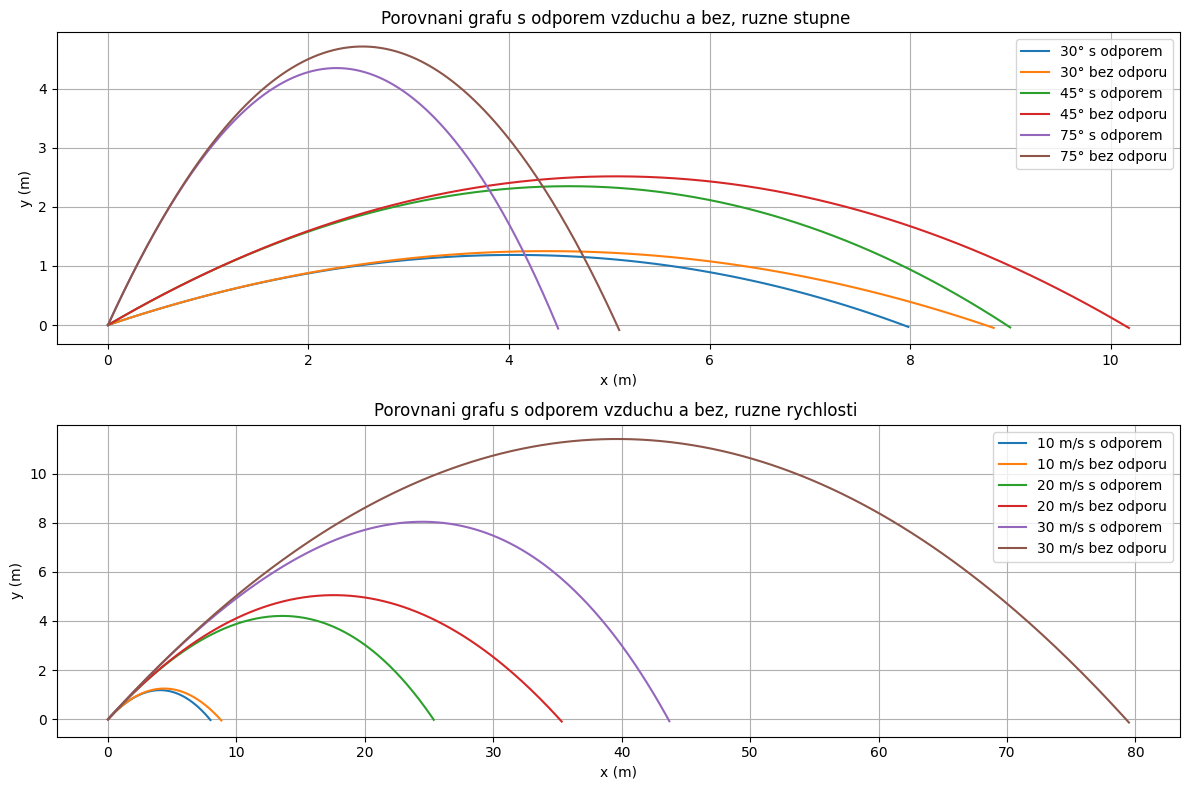

In [3]:
def main():
    uhly = [30, 45, 75]
    rychlosti = [10, 20, 30]

    plt.figure(figsize=(12, 8))


    plt.subplot(2, 1, 1)
    for uhel in uhly:
        poloha_x, poloha_y = spocitej_sikmy_vrh(uhel,pocatecni_rychlost=10, odpor_prostredi=True)
        plt.plot(poloha_x, poloha_y, label=f'{uhel}° s odporem')
        poloha_x1, poloha_y1 = spocitej_sikmy_vrh(uhel,pocatecni_rychlost = 10, odpor_prostredi = False)
        #print(poloha_x1,poloha_y1)
        plt.plot(poloha_x1, poloha_y1, label=f'{uhel}° bez odporu')    
    plt.title('Porovnani grafu s odporem vzduchu a bez, ruzne stupne ')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.grid(True)
    # # #2
    plt.subplot(2, 1, 2)
    for rychlost in rychlosti:
        poloha_x, poloha_y = spocitej_sikmy_vrh(30, rychlost, odpor_prostredi=True)
        plt.plot(poloha_x, poloha_y, label=f'{rychlost} m/s s odporem')
        poloha_x1, poloha_y1 = spocitej_sikmy_vrh(30, rychlost, odpor_prostredi=False)
        plt.plot(poloha_x1, poloha_y1, label=f'{rychlost} m/s bez odporu' )    
    plt.title('Porovnani grafu s odporem vzduchu a bez, ruzne rychlosti ')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    # plt.savefig('ctri.png')
    plt.show()


if __name__ == "__main__":
    main()